## Neural Network vs. Perceptron

In [1]:
#Import all the necessary library for the task
library(ggplot2) #For visualisation
library(reshape2) #For reshape the file

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


All the code and implementation are based on the activity 3.1,5.1 and codebase2B as the following:

I. Load Task2B_train.csv and Task2B_test.csv sets, plot the training data with classes are marked with different colors, and attach the plot to your PDF report.

In [2]:
#Import the csv file
train <- read.csv('Task2B_train.csv')
test <- read.csv('Task2B_test.csv')

#Explore the train dataset 
head(train)

x1,x2,y
-0.4365731,0.31994476,0
-0.3351625,-0.60774359,1
0.8914051,-0.11175734,1
-0.1892440,0.83644710,1
0.9231484,0.60879178,1
-0.8316286,-0.09605136,1


Based on the dimension of the dataset, we will separate the predictors and outcome as the following:

In [3]:
#Remove NA record from dataset to exclude it in the plot and for the next section
train<-train[complete.cases(train[,1:3]),]
test<- test[complete.cases(test[,1:3]),]


#Separate predictors and the outcome:
train_data <- train[,-3]
train_label <- train[3]
test_data <- test[,-3]
test_label <- test[3]



#Change the outcome value for plotting convenience [0,1] -> [-1,+1]
train$y <- ifelse(train$y==0,'-1','+1')
test$y <- ifelse(test$y==0,'-1','+1')

In [4]:
#training set after some pre-process
train_data

x1,x2
-0.436573075,0.31994476
-0.335162522,-0.60774359
0.891405111,-0.11175734
-0.189243995,0.83644710
0.923148445,0.60879178
-0.831628616,-0.09605136
0.473507130,0.51332214
-0.307343076,0.52910812
0.245586524,-0.45799217
-0.020349272,-0.33430431


### Plot the training dataset

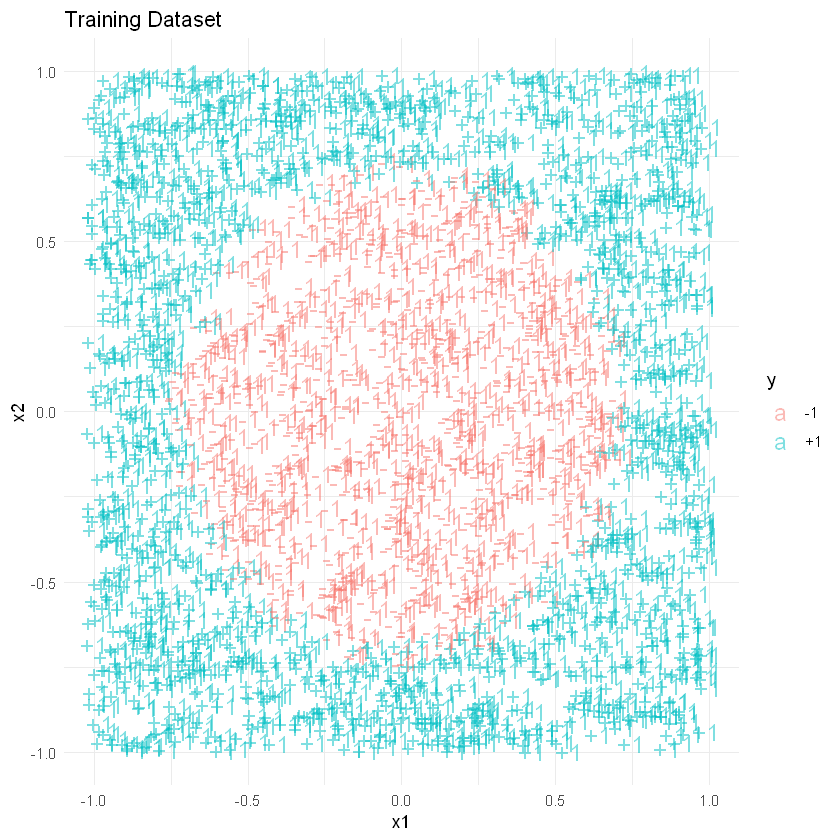

In [5]:
#Plot of the training dataset
ggplot(data=train, aes(x=x1, y=x2, label = y, color = y)) + 
geom_text(size = 5, alpha = 0.5) + ggtitle ('Training Dataset') + theme_minimal()

II. Train two perceptron models on the loaded training data by setting the learning rates η to .01 and .09 respectively, using a code from Activity 3.1. Calculate the test errors of two models and find the best η and its corresponding model, then plot the test data while the points are colored with their estimated class labels using the best model that you have selected; attach the plot to your PDF report.

Hint: Note that you must remove NA records from the datasets (using “complete.cases()’ function). You may also choose to
change the labels from [0, 1] to [-1, +1] for your convenience. If you decided to use the code from Activity 3.1, you may need to change some initial settings (e.g., epsilon and tau.max). Finally, remember 3 that perceptron is sensitive to initial weights. Therefore, we recommend to run your code a few times with different initial weights.

### Perceptron
#### Steps for Building Perceptron 
Assuming the class labels are $+1$ and $-1$, we take the following steps to build a perceptron:

 1- Choose and implement a basis function $\pmb{\phi}$, and initialize weight vector $\pmb{w}$, learning rate $\eta$ and stopping threshold $\epsilon$,

 2- Use the above function and repeat the following until the improvement is superficial (i.e., $|E(\pmb{w}^{(\tau+1)})-E(\pmb{w}^{(\tau)})| < \epsilon$):

* Shuffle the training data

* For each datapoint in the training data do:

 + Classify the sample using the current weight vector,

 + If the sample correctly classified, pick the next point (continue the loop)

 + If the sample misclassified, update the weight vector as $\pmb{w}^{\tau+1} := \pmb{w}^{\tau} + \eta\phi(\pmb{x}_n) t_n$
 
Based on the process described above, the perceptron will be created on eta= 0.1 and eta = 0.9 as the following below:


In [6]:
## Basis function (Step 1)
Phi <- as.matrix(cbind(1, train_data)) # add a column of 1 as phi_0 (empty vector)

#### Initialisation eta= 0.01

using initialisation for sgd

In [7]:
# Initialization
eta <- 0.01 # Learning rate
epsilon <- 0.001 # Stoping criterion
tau.max <- 10000 # Maximum number of iterations

T1 <- ifelse(train_label == 0,as.numeric(-1) ,1) # Convention for class labels for training dataset
T2 <- ifelse(test_label == 0,as.numeric(-1) ,1) # Convention for class labels for testing dataset

W_01 <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
W_01[1,] <- runif(ncol(Phi)) # Random initial values for weight vector

error.trace <- matrix(0,nrow=tau.max, ncol=1) # Placeholder for errors
error.trace[1] <- sum((Phi%*%W_01[1,])*T1<0)/nrow(train_data)*100 # record error for initial weights

tau <- 1 # iteration counter 
terminate <- FALSE # termination status

#### SGD for perceptron eta = 0.01

using an SGD to find the weight where the data is converge

In [8]:
# Main Loop (Step 2):
while(!terminate){
    # resuffling train data and associated labels:
    index <- sample(1:nrow(train_data), replace = FALSE)
    Phi <- Phi[index,]
    T <- T1[index,]

    for (i in 1:nrow(train_data)){
        if (tau == tau.max) {break}
              
        # look for missclassified samples
        if ((W_01[tau,]%*%Phi[i,])*T[i]<0){
            
            # update tau counter
            tau <- tau +1
            
            # update the weights
            W_01[tau,] <- W_01[tau-1,] + eta * Phi[i,] * T[i]
            
            # update the records
            error.trace[tau] <- sum((Phi%*%W_01[tau,])*T<0)/nrow(train_data)*100
        } 
        
    }
    
    # decrease eta:
    eta = eta * 0.99
    # recalculate termination conditions
    terminate <- tau >= tau.max | 
        abs(sum((Phi%*%W_01[tau,])*T<0)/nrow(train_data) - sum((Phi%*%W_01[tau-1,])*T<0)/nrow(train_data)) <= epsilon 
    
}
W_01 <- W_01[1:tau,] # cut the empty part of the matrix (when the loop stops before tau == tau.max)

## the  final result is w:
w_01 <- W_01[tau,]
## report
cat('\n\nThe  final weight vector:', w_01)



The  final weight vector: -0.004238039 0.003809314 0.01258795

In [9]:
#Calculate test error
Phi_test <- as.matrix(cbind(1, test_data))
sum((Phi_test%*%w_01)*T2<0)/nrow(test_data)*100 # testing error

[1] 44.84

#### Initialisation eta=0.09

In [10]:
# Initialization
eta <- 0.09 # Learning rate
epsilon <- 0.001 # Stoping criterion
tau.max <- 10000 # Maximum number of iterations


W_09 <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
W_09[1,] <- runif(ncol(Phi)) # Random initial values for weight vector

error.trace <- matrix(0,nrow=tau.max, ncol=1) # Placeholder for errors
error.trace[1] <- sum((Phi%*%W_09[1,])*T1<0)/nrow(train_data)*100 # record error for initial weights

tau <- 1 # iteration counter 
terminate <- FALSE # termination status

#### SGD for perceptron eta = 0.09

In [11]:
# Main Loop (Step 2):
while(!terminate){
    # resuffling train data and associated labels:
    index <- sample(1:nrow(train_data), replace = FALSE)
    Phi <- Phi[index,]
    T <- T1[index,]

    for (i in 1:nrow(train_data)){
        if (tau == tau.max) {break}
              
        # look for missclassified samples
        if ((W_09[tau,]%*%Phi[i,])*T[i]<0){
            
            # update tau counter
            tau <- tau +1
            
            # update the weights
            W_09[tau,] <- W_09[tau-1,] + eta * Phi[i,] * T[i]
            
            # update the records
            error.trace[tau] <- sum((Phi%*%W_09[tau,])*T<0)/nrow(train_data)*100
        } 
        
    }
    
    # decrease eta:
    eta = eta * 0.99
    # recalculate termination conditions
    terminate <- tau >= tau.max | 
        abs(sum((Phi%*%W_09[tau,])*T<0)/nrow(train_data) - sum((Phi%*%W_09[tau-1,])*T<0)/nrow(train_data)) <= epsilon 
    
}
W_09 <- W_09[1:tau,] # cut the empty part of the matrix (when the loop stops before tau == tau.max)

## the  final result is w:
w_09 <- W_09[tau,]
## report
cat('\n\nThe  final weight vector:', w_09)



The  final weight vector: -0.03054075 -0.09874504 -0.1135806

In [12]:
#Calculate test error
#Phi09_test <- as.matrix(cbind(1, test_data))
sum((Phi_test%*%w_09)*T2<0)/nrow(test_data)*100 # testing error

[1] 48

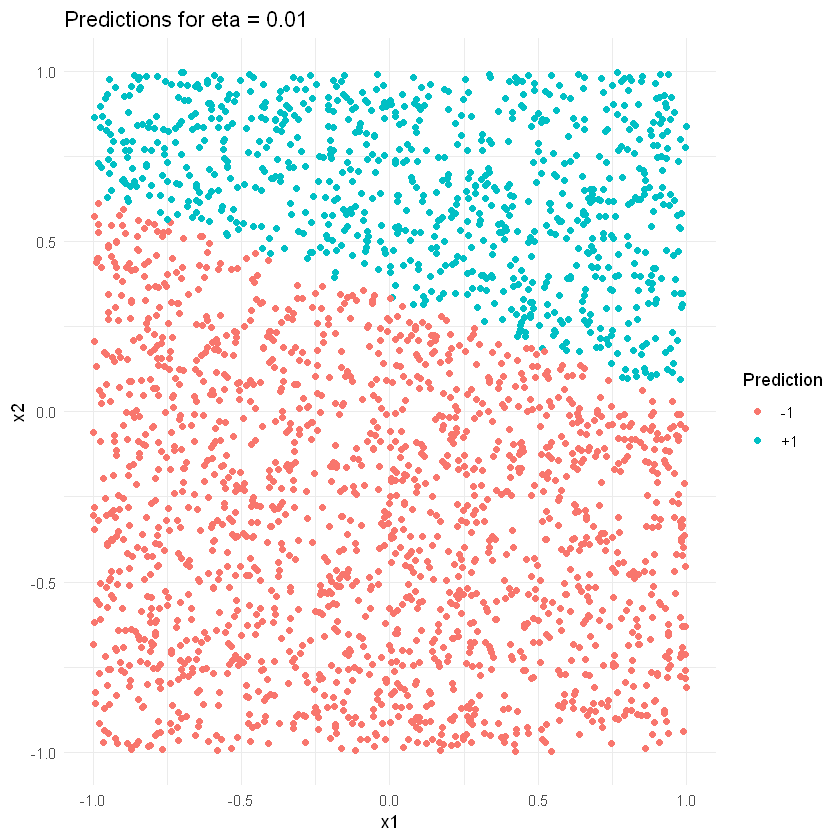

In [13]:
# Visualizations (the testing error of eta 0.01 is 44.84 and for eta 0.09 is 48, so we pick eta 0.01)
## Ploting the decision boundary
ggplot(data=as.data.frame(Phi), aes(x=x1, y=x2, color = factor(ifelse(Phi%*%w_01>0, '+1', '-1')))) +
    geom_point() +
    scale_color_discrete(guide = guide_legend(title = 'Prediction'))+
    ggtitle('Predictions for eta = 0.01') +
    theme_minimal()

III. For each combination of K (i.e, number of units in the hidden layer) in {5, 10, 15, …, 100} and µ (learning rate) in {0.01, 0.09}, run the 3-layer Neural Network given to you in Activity 5.1 and record testing error for each of them (40 models will be developed, based on all possible combinations). Plot the error for µ 0.01 and 0.09 vs. K (one line for µ 0.01 and another line for µ 0.09 in a plot) and attach it to your PDF report. Based on this plot, find the best combination of K and µ and the
corresponding model, then plot the test data while the points are colored with their estimated class labels using the best model that you have selected; attach the plot to your PDF report.

Hint: In case you choose to use the provided examples in Activity 5.1, you may need to transpose the dataset (using “t()” function) and use different values for parameter settings (e.g., lambda).

### Neural Network

The neural network will be created as the following process described below:
1. Create a auxilary function which will be used for create an activation function (tanh function which return value +1 or -1), derivation function, prediction and error rate function
2. Create a feed forward and backpropagation for the neural network training that will be returnung the model prediction based on the input, hidden and output layers

#### The following is the function for returning multiple list and reading the data

In [14]:
## The following structure helps us to have functions with multiple outputs
### credit: https://stat.ethz.ch/pipermail/r-help/2004-June/053343.html
list <- structure(NA,class="result")
"[<-.result" <- function(x,...,value) {
   args <- as.list(match.call())
   args <- args[-c(1:2,length(args))]
   length(value) <- length(args)
   for(i in seq(along=args)) {
     a <- args[[i]]
     if(!missing(a)) eval.parent(substitute(a <- v,list(a=a,v=value[[i]])))
   }
   x
}

# reading the data
read.data <- function(file.name, scaling=FALSE) {
  data <- read.csv(file=file.name,head=TRUE,sep=",")
  data <- data[complete.cases(data),] # removes rows with NA values
  D <- ncol(data)
  x = data[,-D]
  y = data[,D]
  if (isTRUE(scaling)) {
    x = scale(x)
    y = scale(y)
  }
  return (list('x' = x, 'y' = y))
}

# Read the datasets
set.seed(1234)          # set random seed
list[X1,T1] <- read.data('Task2B_train.csv') # read training data
T1[T1==0] <- -1         # convert 0 labels to -1 
list[X2,T2] <- read.data('Task2B_test.csv') # read test data
T2[T2==0] <- -1         # convert 0 labels to -1

#### Auxiliary Function 

The information of auxiliary function is derieved from activity 5.1 as the following:

We need to define some auxiliary functions. In particular, we implement activation function `h` and its derivitive `h.d`. Then, we will have output `probability` function that for each point it calculates the probability of being a memeber of class `c1` (in the output layer). Finally, we implement `prediction` and `accuracy` funcitons that calculate the class labels and the accuracy percentage, respectively.

**Note 1:** Since the output of our neural network is the probability of class `c1`, we classify the points with any probability larger thatn `0.5` as a member of `c1`. All the other points will be labeled as `c0`.

**Note 2:** The structure `list` that is defined at the end of the following piece of code helps us to define functions that can return multiple variables at the same time. We will use this structure in the `feedforward` and `backpropagation` functions.

In [15]:
# auxiliary functions 
## the activation function (tanh here)
h <- function(z) { 
  return ((exp(z)-exp(-z))/(exp(z)+exp(-z)))
}

## the derivitive of the activation function (tanh here)
h.d <- function(z) {
return (1-(h(z))^2)
}

## Class Probabilities
class.prob <- function(X, W1, W2, b1, b2){
  a2 <- h(sweep(W1 %*% X, 1, b1,'+' ))
  a3 <- h(sweep(W2 %*% a2, 1, b2,'+' ))
  return (a3)
}
## prediction
nn.predict <- function(X, W1, W2, b1, b2, threshold=0){
  return (ifelse(class.prob(X, W1, W2, b1, b2)>=threshold, 1, -1))
}


## Error rate
error_pred <- function(Y,T){
    if (length(Y)!=length(T)){
    stop('error.rate: size of true lables and predicted labels mismatch')
  }
  return (sum(T!=Y)/length(T))
}

### Feedforward Function
The following function perform one feedforward pass for a 3-layer feedforward network. We will call this function in a loop to train our network.

In [16]:
feedforward <- function(Xi, Ti, W1, b1, W2, b2){
    ### 1st (input) layer 
    a1 <- Xi
    y <- Ti
    ### 2nd (hidden) layer
    z2 <- W1 %*% a1 + b1
    a2 <- h(z2)        
    ### 3rd (output) layer
    z3 <- W2 %*% a2 + b2
    a3 <- h(z3)  
    return(list(a1, a2, a3, y, z2, z3))
}

### Backpropagation Function
The following function perform one backpropagation pass for a 3-layer feedforward network. We will call this function after each feedforward step..

In [17]:
backpropagation <- function(Ti, W2, z2, z3, a3){
    ### 3rd (output) layer
    d3 <- -(Ti-a3) * h.d(z3)
    ### 2nd (hidden) layer
    d2 <-  t(W2)%*%d3  * h.d (z2)
    return(list(d2,d3))
}

### Neural Network function

In [18]:
#Neural network function
nn.build <- function(K, X1, T1, plotting=FALSE, epoch.max=50, eta = 0.1, lambda = 0.01){
  # initialization
  if (plotting) {error.rec <- matrix(NA,nrow=epoch.max, ncol=1)}
  D <- nrow(X1)
  if (D!=2) {stop('nn.predict: This simple version only accepts two dimensional data.')}
  N <- ncol(X1)

  W1 <- matrix(rnorm(D*K, sd=0.5), nrow=K, ncol=D)
  b1 <- matrix(rnorm(1*K), nrow=K, ncol=1)
  W2 <- matrix(rnorm(K*1, sd=0.5), nrow=1, ncol=K)
  b2 <- matrix(rnorm(1*1), nrow=1, ncol=1)

  for (epoch in 1:epoch.max){   
    ## delta vectors/matrices initialization
    W1.d <- W1 *0
    b1.d <- b1 *0
    W2.d <- W2 *0
    b2.d <- b2 *0

    for (i in 1:N){
      ## Feedforward:
      list[a1, a2, a3, y, z2, z3] <- feedforward(X1[,i], T1[i], W1, b1, W2, b2)          
      ## Backpropagation:
      list[d2, d3] <- backpropagation(T1[i], W2, z2, z3, a3)
      ## calculate the delta values
      ### 1st layer
      W1.d <- W1.d + d2 %*% t(a1)
      b1.d <- b1.d + d2
      ### 2nd layer
      W2.d <- W2.d + d3 %*% t(a2)
      b2.d <- b2.d + d3
    }
    ## update weight vectors and matrices
    W1 <- W1 - eta * (W1.d/N + lambda*W1)
    b1 <- b1 - eta * (b1.d/N)
    W2 <- W2 - eta * (W2.d/N + lambda*W2)
    b2 <- b2 - eta * (b2.d/N)
    ## record the errors
    if (plotting){error.rec[epoch]<- error.rate(nn.predict(X1, W1, W2, b1, b2), T1)}
  }
  return(list(W1, W2, b1, b2))
}


In [19]:
#Convert data and label to matrix
X1.t <- t(as.matrix(X1))
X2.t <- t(as.matrix(X2))

In [20]:
# create dataframe to receive errors for both eta (0.01 & 0.09) take a while to run
neural_test_error <- data.frame(matrix(nrow = 40, ncol =3, dimnames = list(NULL,c("eta", "k", "Test_Error"))))
i = 1
# Build a number of Neural Networks with different number of units in the hidden layer
for (k in seq(5, 100, 5)) {
    for(eta in c(0.01, 0.09)){
  param <- nn.build(k, X1.t, T1, plotting=FALSE, epoch.max=500, eta = eta, lambda = 0.0001)
  # Evaluate the model
  test_prediction <- nn.predict(X2.t, param[[1]], param[[2]], param[[3]], param[[4]])
  test_error <- error_pred(test_prediction, T2)
  # Record the test errors for plotting purposes
  neural_test_error[i,] <- c(eta, k, test_error)
  i = i+1
}}

In [21]:
#Result of storing the value of neural network result
neural_test_error

eta,k,Test_Error
0.01,5,0.3908
0.09,5,0.2980
0.01,10,0.4044
0.09,10,0.0832
0.01,15,0.2360
0.09,15,0.0568
0.01,20,0.2172
0.09,20,0.0524
0.01,25,0.3552
0.09,25,0.3980


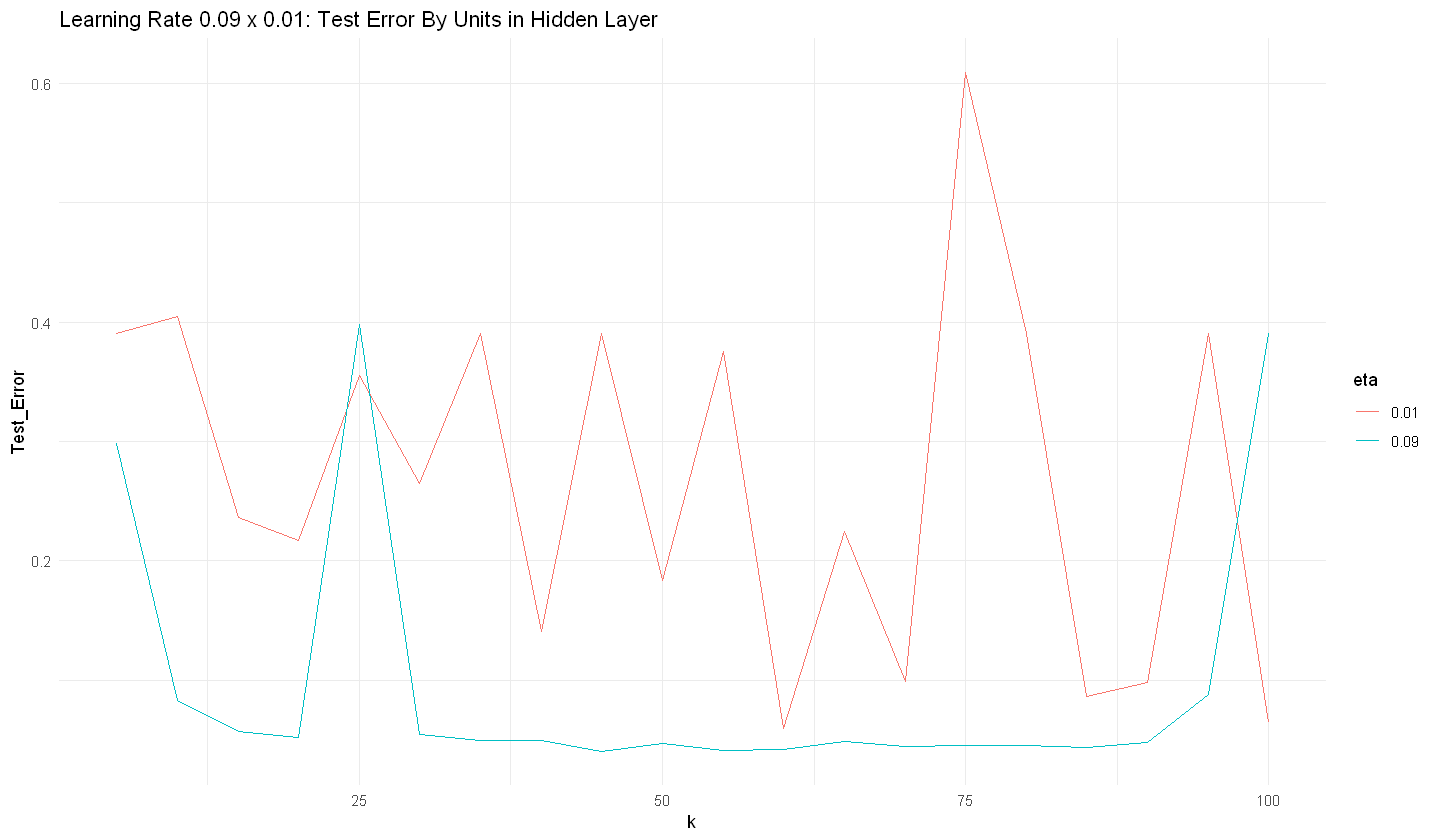

In [22]:
#Plot of the test error 
neural_test_error[,"eta"] <- as.factor(neural_test_error[,"eta"])

options(repr.plot.width = 12, repr.plot.height = 7) # Define plot size
ggplot(data = neural_test_error, aes(k, Test_Error, color = eta)) + geom_line() + 
            ggtitle("Learning Rate 0.09 x 0.01: Test Error By Units in Hidden Layer") + theme_minimal()

In [23]:
#Find the optimal neural network model
top_pred <- neural_test_error[neural_test_error$Test_Error == min(neural_test_error$Test_Error),]
top_pred

,eta,k,Test_Error
18,0.09,45,0.0404


In [27]:
# retrieving predictions given best parameters
new_param <- nn.build(K = 45, X1.t, T1, epoch.max=500, eta = 0.09, lambda = 0.0001)
test.prediction <- nn.predict(X2.t, new_param[[1]], new_param[[2]], new_param[[3]], new_param[[4]])
X2$pred <- c(ifelse(test.prediction==-1,'-1','+1'))

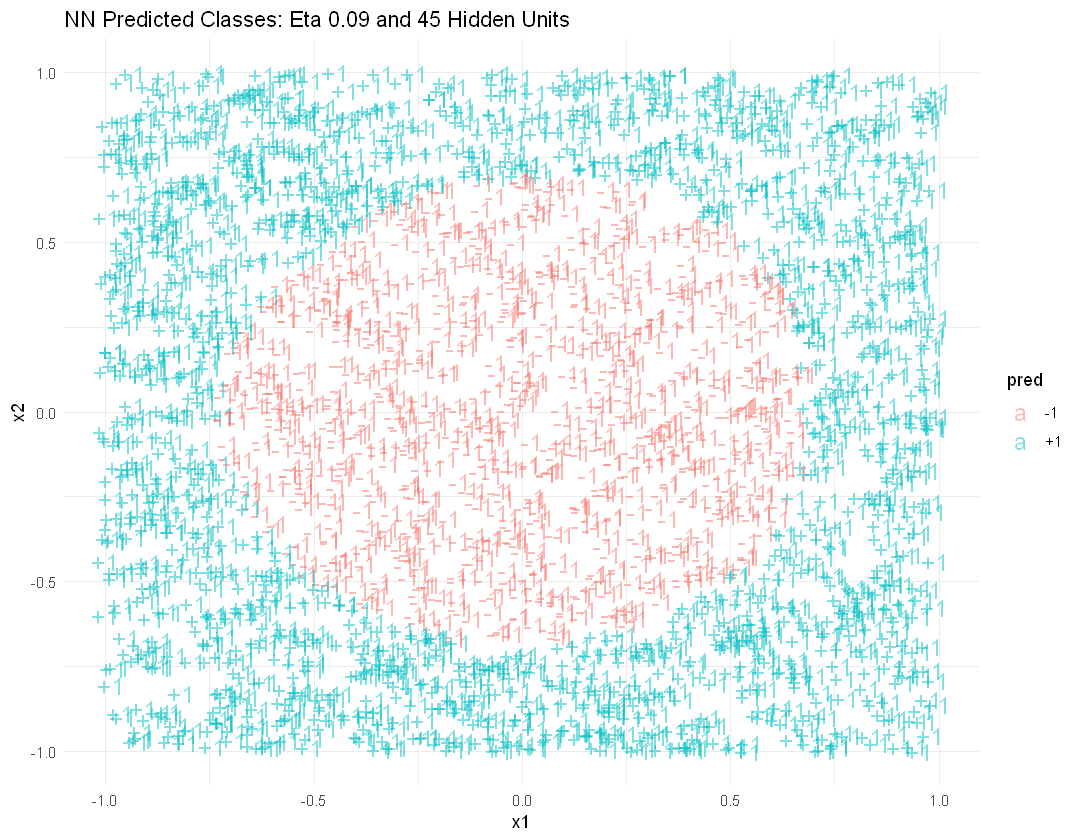

In [28]:
# plotting the result of the optimal neural network
options(repr.plot.width = 9, repr.plot.height = 7) # Define plot size
ggplot(data=X2, aes(x=x1, y=x2, color = pred, label= pred)) + 
                    geom_text(size = 5, alpha = 0.5) +
                    ggtitle ('NN Predicted Classes: Eta 0.09 and 45 Hidden Units') + theme_minimal()

## Reference

- Haffari, G. & Kazimipour, B. (2016, July). $\textit{codeBase2B.R}$. https://lms.monash.edu/pluginfile.php/14028238/mod_assign/intro/Dataset%20and%20Sample%20code_2022.zip
- Jupyter Notebooks:FIT5201 Machine Learning, (nd.). $\textit{Activity 3.1 Perceptron}$. 
https://lms.monash.edu/mod/folder/view.php?id=10133948
- Jupyter Notebooks:FIT5201 Machine Learning, (nd.). $\textit{Activity 5.1 Neural Network}$. 
https://lms.monash.edu/mod/resource/view.php?id=10251992
